In [1]:
## Versuch mit extern geladenen Daten

# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib  # Für das Lesen von fMRI-Daten
from nilearn import datasets, image, plotting  # Für die Visualisierung der Gehirnaktivität
from nilearn.connectome import ConnectivityMeasure  # Für die Berechnung der Functional Connectomes
import nibabel as nib

# Verzeichnis und Pfad zu Ihren lokalen Dateien
template_path = "/Users/thomaspfaffinger/Coding/BrainActivity/mni_icbm152_nlin_asym_09b_nifti/mni_icbm152_nlin_asym_09b/mni_icbm152_t2_tal_nlin_asym_09b_hires.nii"
harvard_aan_atlas_path = "/Users/thomaspfaffinger/Coding/BrainActivity/doi_10_5061_dryad_zw3r228d2__v20230718/AAN_Brainstem_MNI152_1mm_v2p0.nii"
file_path_adhs_bold = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_task-rest_run-1_bold.nii"

# Laden der neuen fMRI-Daten
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)

# Laden des MNI 2009b NLIN asymmetric T2 Templates
mni_template = nib.load(template_path)

# Resample die fMRI-Daten in den MNI-Raum
fmri_img_mni = image.resample_to_img(fmri_img_adhs2_bold, mni_template)

/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


In [2]:
print(fmri_img_mni.shape)

(394, 466, 378, 78)


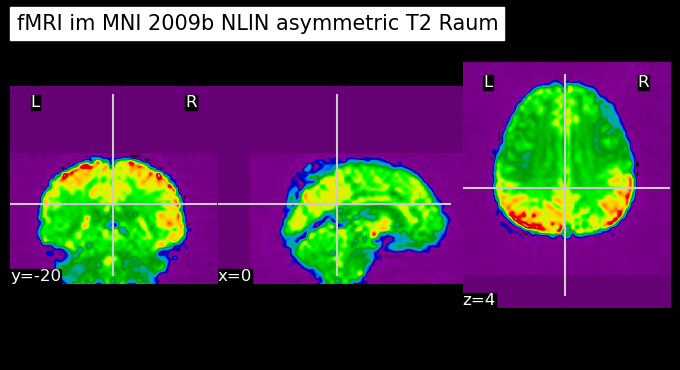

In [3]:
# Überprüfen der resampleten fMRI-Daten im MNI-Raum
plotting.plot_epi(fmri_img_mni.slicer[:,:,:,40], title='fMRI im MNI 2009b NLIN asymmetric T2 Raum')
plotting.show()

(182, 218, 182)


/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:492: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


(394, 466, 378)


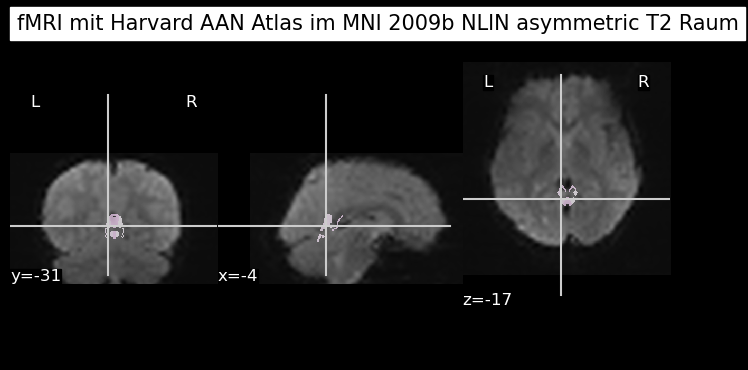

In [4]:
# Laden des Harvard AAN Atlas
harvard_aan_atlas = nib.load(harvard_aan_atlas_path)
print(harvard_aan_atlas.shape)


# Resample den Harvard AAN Atlas, um mit den fMRI-Daten übereinzustimmen
resampled_harvard_aan_atlas = image.resample_to_img(harvard_aan_atlas, fmri_img_mni, interpolation='nearest')
print(resampled_harvard_aan_atlas.shape)

# Visualisieren des Harvard AAN Atlas auf den fMRI-Daten im MNI-Raum
#Folgender plott klappt nicht, da hierfür ein 4D nifti Atlas benötigt wird...
#plotting.plot_prob_atlas(resampled_harvard_aan_atlas, bg_img=fmri_img_mni.slicer[:, :, :, 0], title='fMRI mit Harvard AAN Atlas im MNI 2009b NLIN asymmetric T2 Raum')

plotting.plot_roi(resampled_harvard_aan_atlas, bg_img=fmri_img_mni.slicer[:, :, :, 40], title='fMRI mit Harvard AAN Atlas im MNI 2009b NLIN asymmetric T2 Raum')

plotting.show()
